## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


# Step 1: Examining Data

1. Clean Data to create unique columns that display data
2. Run a simple linear regression to analyze basic findings
3. Run multiple linear regressions to cement findings

In [443]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
import sklearn.metrics as metrics
from random import gauss
from mpl_toolkits.mplot3d import Axes3D
from scipy import stats as stats

In [444]:
#Loading in Data Sets
#data contains all raw data
data = pd.read_csv('data/kc_house_data.csv')
#merged aspects of cleaned data set 
data_2 = pd.read_csv('data/kc_house_data_clean.csv')

In [445]:
#Examined first five entries
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,...,sewer_system,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long
0,7399300360,5/24/2022,675000.0,4,1.0,1180,7140,1.0,NO,NO,...,PUBLIC,1180,0,0,40,1969,0,"2102 Southeast 21st Court, Renton, Washington ...",47.461975,-122.19052
1,8910500230,12/13/2021,920000.0,5,2.5,2770,6703,1.0,NO,NO,...,PUBLIC,1570,1570,0,240,1950,0,"11231 Greenwood Avenue North, Seattle, Washing...",47.711525,-122.35591
2,1180000275,9/29/2021,311000.0,6,2.0,2880,6156,1.0,NO,NO,...,PUBLIC,1580,1580,0,0,1956,0,"8504 South 113th Street, Seattle, Washington 9...",47.502045,-122.22520
3,1604601802,12/14/2021,775000.0,3,3.0,2160,1400,2.0,NO,NO,...,PUBLIC,1090,1070,200,270,2010,0,"4079 Letitia Avenue South, Seattle, Washington...",47.566110,-122.29020
4,8562780790,8/24/2021,592500.0,2,2.0,1120,758,2.0,NO,NO,...,PUBLIC,1120,550,550,30,2012,0,"2193 Northwest Talus Drive, Issaquah, Washingt...",47.532470,-122.07188


In [446]:
#Understanding columns and datatypes
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30155 entries, 0 to 30154
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             30155 non-null  int64  
 1   date           30155 non-null  object 
 2   price          30155 non-null  float64
 3   bedrooms       30155 non-null  int64  
 4   bathrooms      30155 non-null  float64
 5   sqft_living    30155 non-null  int64  
 6   sqft_lot       30155 non-null  int64  
 7   floors         30155 non-null  float64
 8   waterfront     30155 non-null  object 
 9   greenbelt      30155 non-null  object 
 10  nuisance       30155 non-null  object 
 11  view           30155 non-null  object 
 12  condition      30155 non-null  object 
 13  grade          30155 non-null  object 
 14  heat_source    30123 non-null  object 
 15  sewer_system   30141 non-null  object 
 16  sqft_above     30155 non-null  int64  
 17  sqft_basement  30155 non-null  int64  
 18  sqft_g

In [447]:
#Looking for relationships
data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,lat,long
count,3.015500e+04,3.015500e+04,30155.000000,30155.000000,30155.000000,3.015500e+04,30155.000000,30155.000000,30155.000000,30155.000000,30155.000000,30155.000000,30155.000000,30155.000000,30155.000000
mean,4.538104e+09,1.108536e+06,3.413530,2.334737,2112.424739,1.672360e+04,1.543492,1809.826098,476.039396,330.211142,217.412038,1975.163953,90.922301,47.328076,-121.317397
std,2.882587e+09,8.963857e+05,0.981612,0.889556,974.044318,6.038260e+04,0.567717,878.306131,579.631302,285.770536,245.302792,32.067362,416.473038,1.434005,5.725475
min,1.000055e+06,2.736000e+04,0.000000,0.000000,3.000000,4.020000e+02,1.000000,2.000000,0.000000,0.000000,0.000000,1900.000000,0.000000,21.274240,-157.791480
25%,2.064175e+09,6.480000e+05,3.000000,2.000000,1420.000000,4.850000e+03,1.000000,1180.000000,0.000000,0.000000,40.000000,1953.000000,0.000000,47.405320,-122.326045
50%,3.874011e+09,8.600000e+05,3.000000,2.500000,1920.000000,7.480000e+03,1.500000,1560.000000,0.000000,400.000000,150.000000,1977.000000,0.000000,47.551380,-122.225585
75%,7.287100e+09,1.300000e+06,4.000000,3.000000,2619.500000,1.057900e+04,2.000000,2270.000000,940.000000,510.000000,320.000000,2003.000000,0.000000,47.669913,-122.116205
max,9.904000e+09,3.075000e+07,13.000000,10.500000,15360.000000,3.253932e+06,4.000000,12660.000000,8020.000000,3580.000000,4370.000000,2022.000000,2022.000000,64.824070,-70.074340


In [448]:
#analyzed basic coorelations between variables and price
#selecting sqft_living as for simple linear regression
data.corr(method ='pearson', min_periods=1)

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,lat,long
id,1.000000,-0.034184,-0.006306,-0.012094,-0.027932,-0.119101,0.032043,-0.023216,-0.014662,-0.007829,-0.041625,0.023071,-0.029131,-0.000691,0.000479
price,-0.034184,1.000000,0.289204,0.480401,0.608521,0.085730,0.180576,0.538651,0.245058,0.264169,0.313409,0.096013,0.084786,0.063632,-0.022509
bedrooms,-0.006306,0.289204,1.000000,0.589273,0.637874,0.003306,0.147592,0.547164,0.238502,0.319441,0.183439,0.146191,0.014286,0.108758,-0.106689
bathrooms,-0.012094,0.480401,0.589273,1.000000,0.772677,0.035886,0.404412,0.674924,0.260902,0.457022,0.327551,0.443648,0.040631,-0.005225,0.017400
sqft_living,-0.027932,0.608521,0.637874,0.772677,1.000000,0.119563,0.304240,0.883984,0.338460,0.511740,0.396030,0.291694,0.038499,0.102186,-0.087669
sqft_lot,-0.119101,0.085730,0.003306,0.035886,0.119563,1.000000,-0.032097,0.129231,0.004111,0.087169,0.155250,0.001750,0.010049,0.030020,-0.034308
floors,0.032043,0.180576,0.147592,0.404412,0.304240,-0.032097,1.000000,0.448281,-0.248093,0.132656,0.125183,0.544646,-0.025449,-0.218554,0.233781
sqft_above,-0.023216,0.538651,0.547164,0.674924,0.883984,0.129231,0.448281,1.000000,-0.066801,0.560551,0.312117,0.387448,0.010598,0.092258,-0.082744
sqft_basement,-0.014662,0.245058,0.238502,0.260902,0.338460,0.004111,-0.248093,-0.066801,1.000000,0.026361,0.210500,-0.230226,0.053634,0.059788,-0.045208
sqft_garage,-0.007829,0.264169,0.319441,0.457022,0.511740,0.087169,0.132656,0.560551,0.026361,1.000000,0.216354,0.447560,-0.098603,0.092346,-0.096861


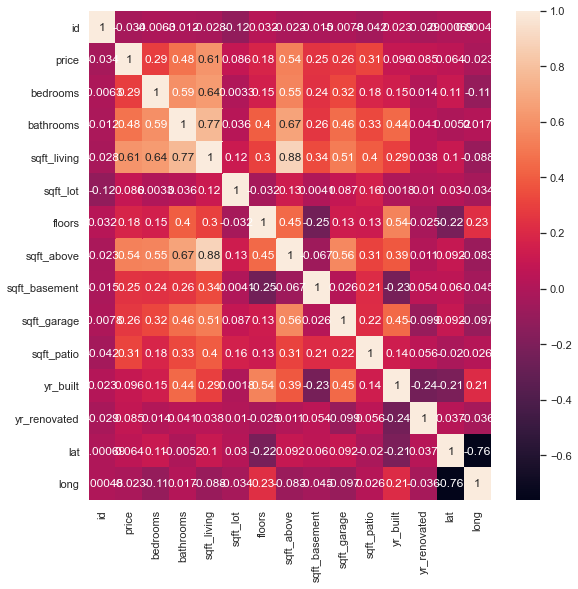

In [449]:
sns.set(rc={'figure.figsize':(9, 9)})
sns.heatmap(Complete_data.corr(), annot=True);

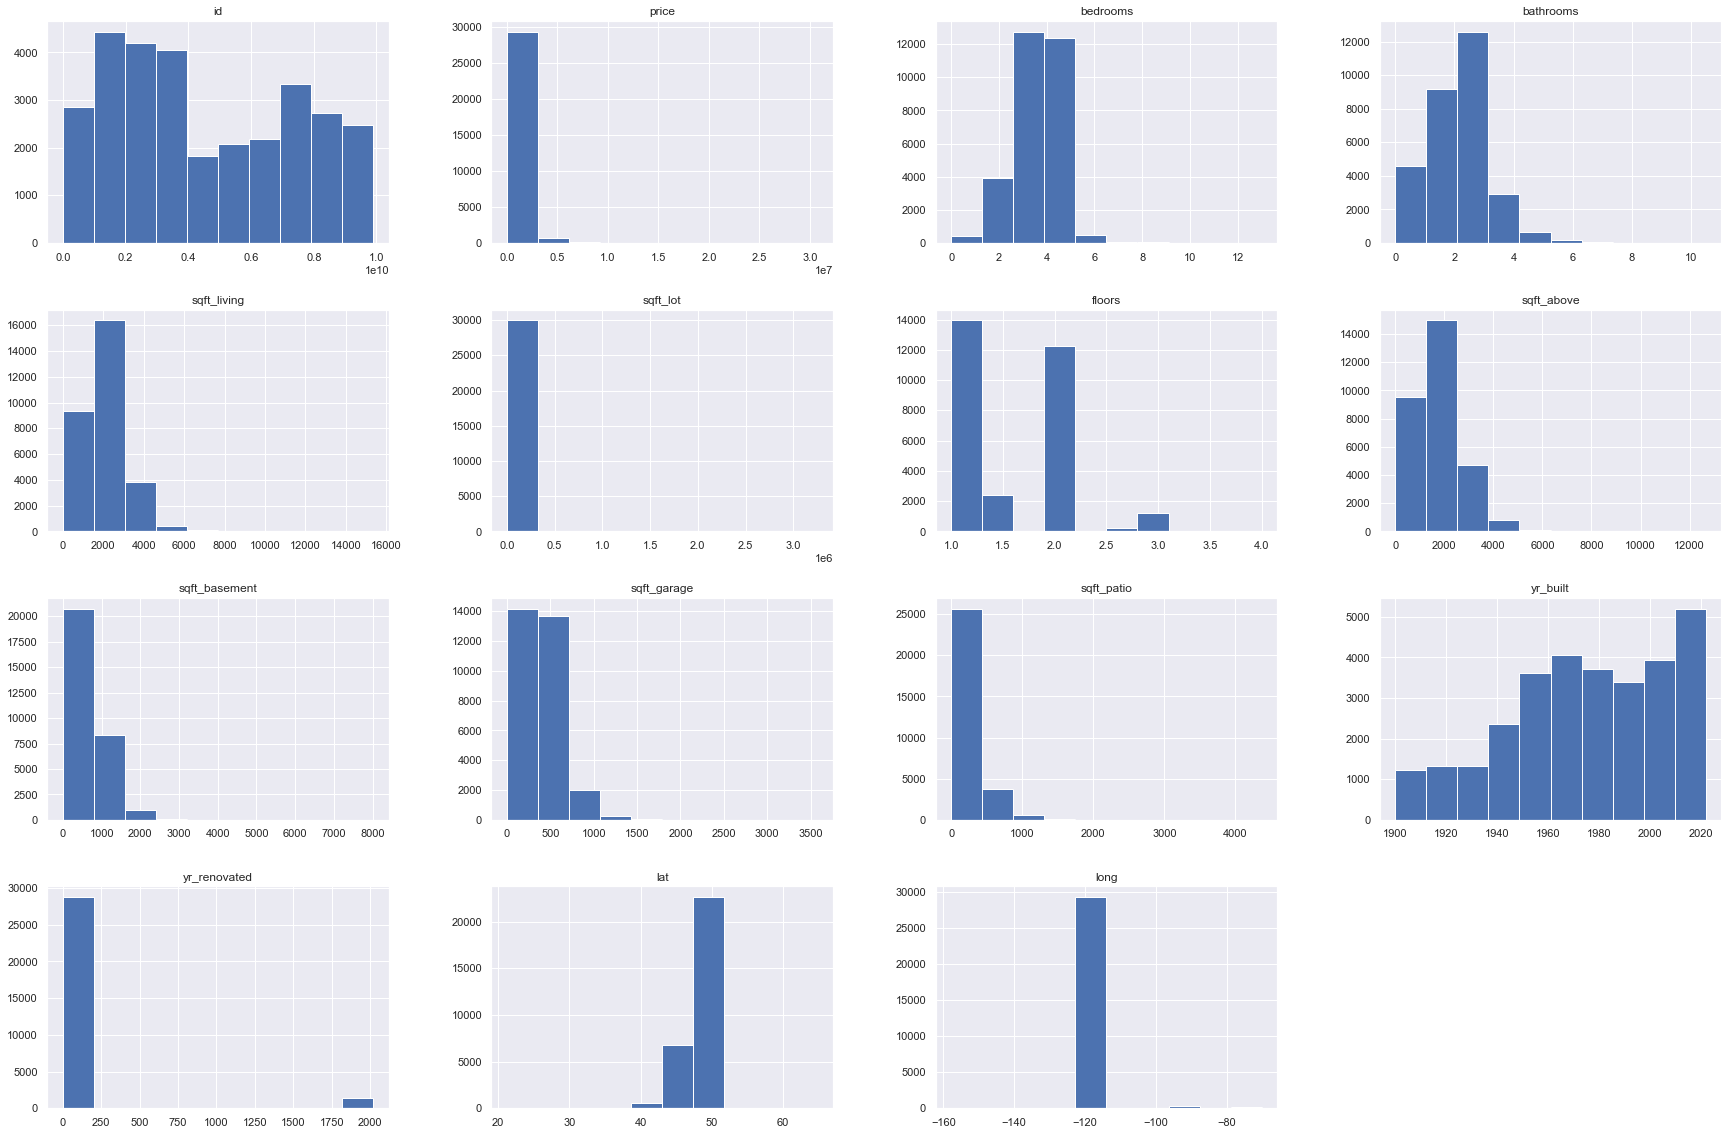

In [387]:
data.hist(figsize=(30,20))
plt.show()

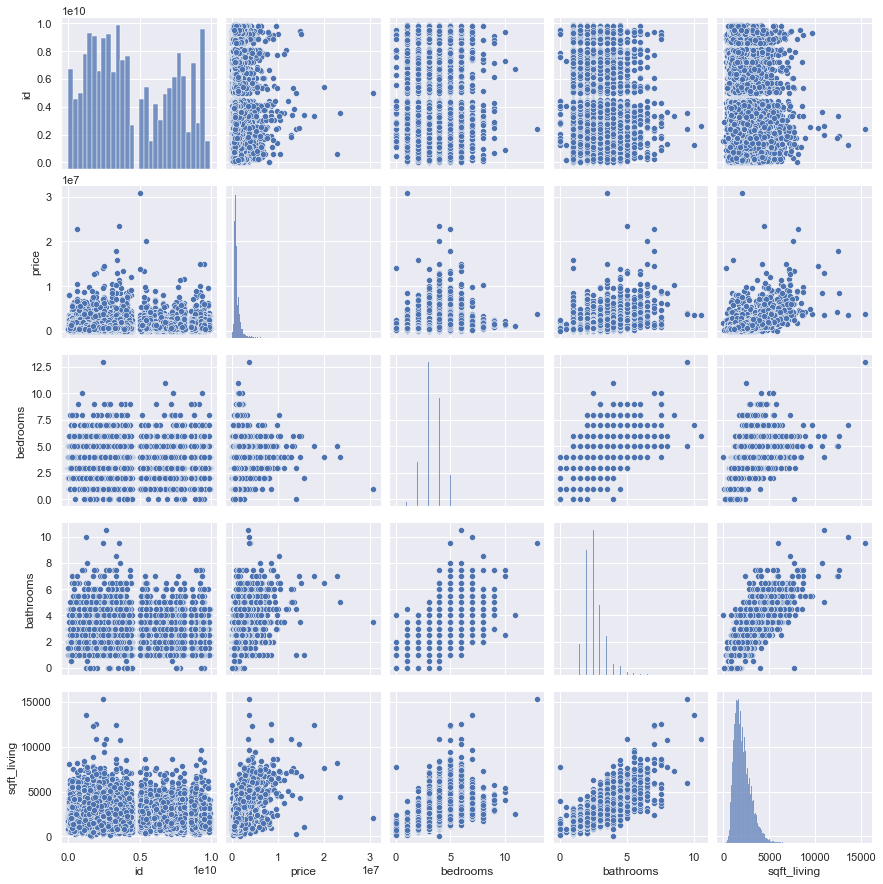

In [388]:
columns = [True if j < 6 or j == 11 else False for j in range(25)]

sns.pairplot(data=data.iloc[:, columns]);

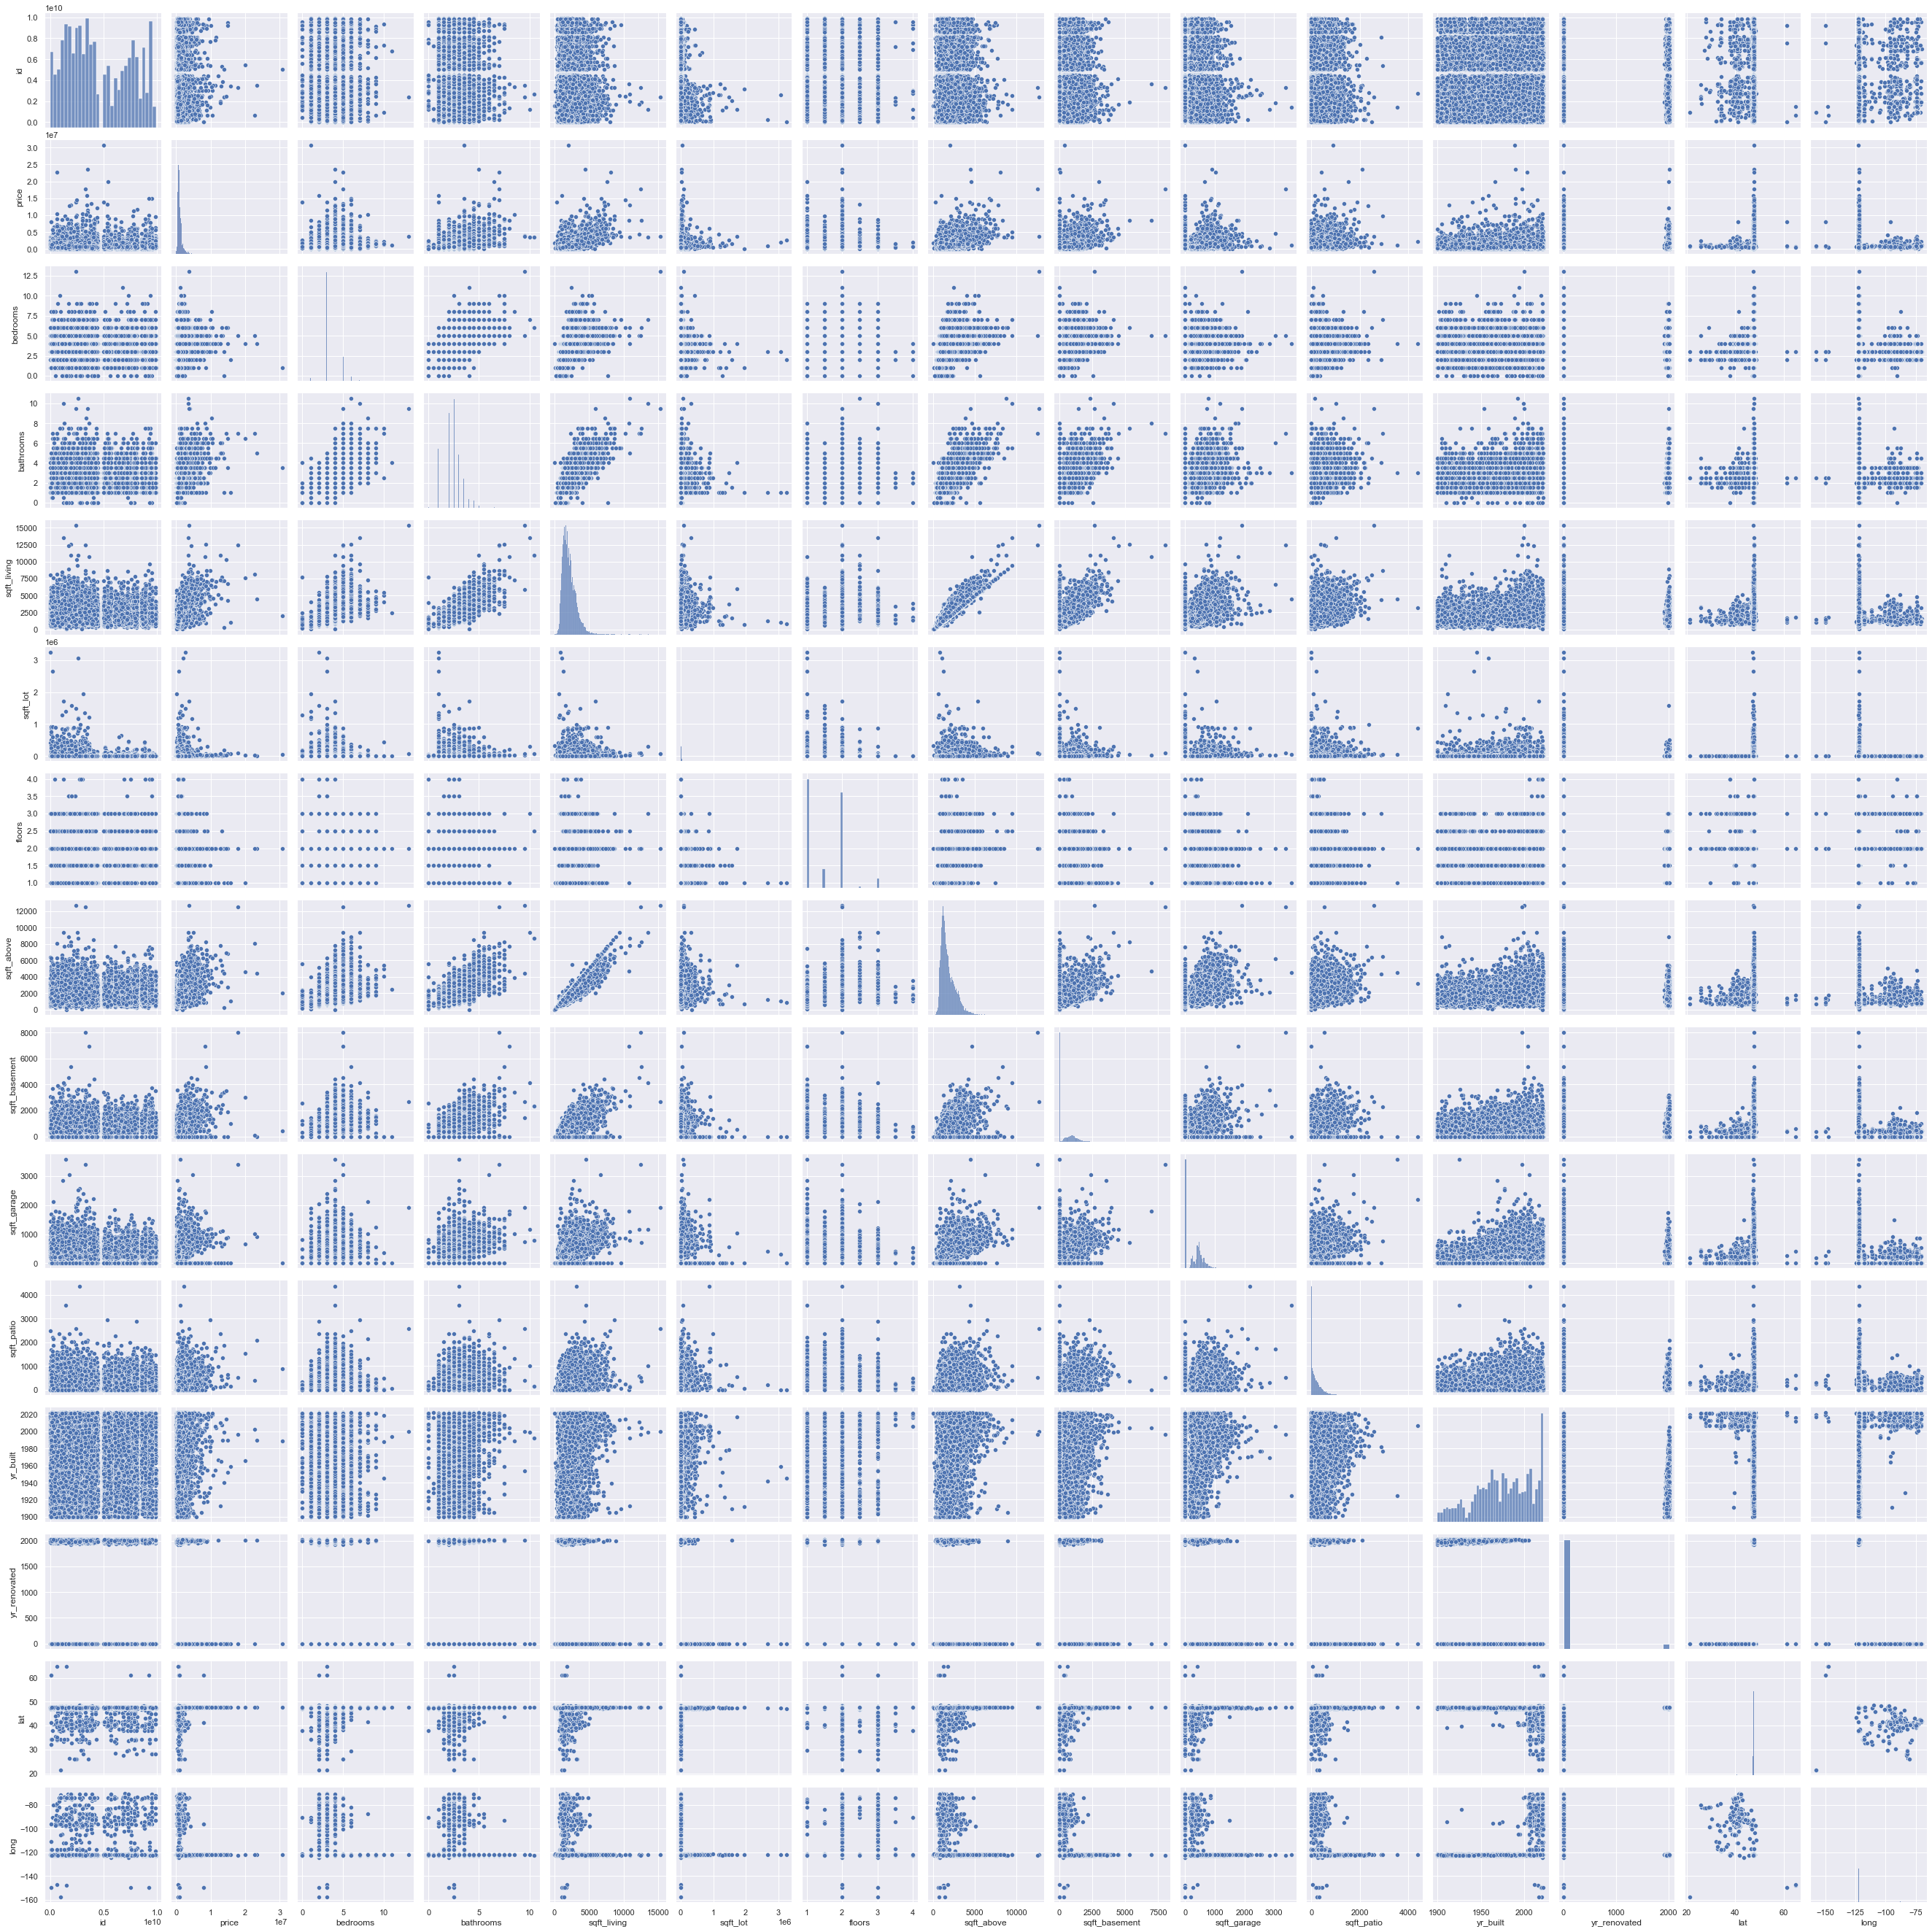

In [389]:
sns.set(rc={'figure.figsize':(15,15)})
sns.pairplot(data=data)

# Cleaning

In [450]:
data.isna().sum()

id                0
date              0
price             0
bedrooms          0
bathrooms         0
sqft_living       0
sqft_lot          0
floors            0
waterfront        0
greenbelt         0
nuisance          0
view              0
condition         0
grade             0
heat_source      32
sewer_system     14
sqft_above        0
sqft_basement     0
sqft_garage       0
sqft_patio        0
yr_built          0
yr_renovated      0
address           0
lat               0
long              0
dtype: int64

In [451]:
#fill in na values
data.fillna(value=0, inplace=True)

In [452]:
#dropping irrelevant columns
data.drop(['id', 'lat', 'long'], axis=1, inplace=True)

In [453]:
#Converts the format of numbers to be just years
data['date'] = pd.DatetimeIndex(data['date']).year
data.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,nuisance,...,grade,heat_source,sewer_system,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address
0,2022,675000.0,4,1.0,1180,7140,1.0,NO,NO,NO,...,7 Average,Gas,PUBLIC,1180,0,0,40,1969,0,"2102 Southeast 21st Court, Renton, Washington ..."
1,2021,920000.0,5,2.5,2770,6703,1.0,NO,NO,YES,...,7 Average,Oil,PUBLIC,1570,1570,0,240,1950,0,"11231 Greenwood Avenue North, Seattle, Washing..."
2,2021,311000.0,6,2.0,2880,6156,1.0,NO,NO,NO,...,7 Average,Gas,PUBLIC,1580,1580,0,0,1956,0,"8504 South 113th Street, Seattle, Washington 9..."
3,2021,775000.0,3,3.0,2160,1400,2.0,NO,NO,NO,...,9 Better,Gas,PUBLIC,1090,1070,200,270,2010,0,"4079 Letitia Avenue South, Seattle, Washington..."
4,2021,592500.0,2,2.0,1120,758,2.0,NO,NO,YES,...,7 Average,Electricity,PUBLIC,1120,550,550,30,2012,0,"2193 Northwest Talus Drive, Issaquah, Washingt..."


In [454]:
#Creates a new column subtracting data and year built with an absolute function
#helps us determine age of houses
data['age'] = np.abs(data['yr_built'] - data['date'])
data.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,nuisance,...,heat_source,sewer_system,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,age
0,2022,675000.0,4,1.0,1180,7140,1.0,NO,NO,NO,...,Gas,PUBLIC,1180,0,0,40,1969,0,"2102 Southeast 21st Court, Renton, Washington ...",53
1,2021,920000.0,5,2.5,2770,6703,1.0,NO,NO,YES,...,Oil,PUBLIC,1570,1570,0,240,1950,0,"11231 Greenwood Avenue North, Seattle, Washing...",71
2,2021,311000.0,6,2.0,2880,6156,1.0,NO,NO,NO,...,Gas,PUBLIC,1580,1580,0,0,1956,0,"8504 South 113th Street, Seattle, Washington 9...",65
3,2021,775000.0,3,3.0,2160,1400,2.0,NO,NO,NO,...,Gas,PUBLIC,1090,1070,200,270,2010,0,"4079 Letitia Avenue South, Seattle, Washington...",11
4,2021,592500.0,2,2.0,1120,758,2.0,NO,NO,YES,...,Electricity,PUBLIC,1120,550,550,30,2012,0,"2193 Northwest Talus Drive, Issaquah, Washingt...",9


In [455]:
data_2.head(1)

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long,district
0,0,7399300360,2022-05-24,675000.0,4,1.0,1180,7140,1.0,NO,...,1180,0,0,40,1969,0,"2102 Southeast 21st Court, Renton, Washington ...",47.461975,-122.19052,Renton


In [456]:
data_2['postal_code'] = data_2['address'].str[-20:-15]
data_2['City'] = data_2.address.str.split(',', expand = True)[1]
data_2['Street'] = data_2.address.str.split(',', expand = True)[0]
data_2['State_Zip'] = data_2.address.str.split(',', expand = True)[2]
data_2['State_Zip'] = data_2['State_Zip'].str.strip()
data_2['Country'] = data_2.address.str.split(',', expand = True)[3]
data_2['State'] = data_2.State_Zip.str.split(' ', expand = True)[0]
data_2['Zip'] = data_2.State_Zip.str.split(' ', expand = True)[1]

data_2.drop(['address','State', 'State_Zip', 'Country', 'postal_code', 'City', 'Street'], axis=1, inplace=True)
data_2 = data_2.rename(columns = {"Zip":"Zipcode"})
data_2.head(1)

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,lat,long,district,Zipcode
0,0,7399300360,2022-05-24,675000.0,4,1.0,1180,7140,1.0,NO,...,1180,0,0,40,1969,0,47.461975,-122.19052,Renton,98055


In [457]:
data_2.isna().sum()

Unnamed: 0       0
id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
greenbelt        0
nuisance         0
view             0
condition        0
grade            0
heat_source      0
sewer_system     0
sqft_above       0
sqft_basement    0
sqft_garage      0
sqft_patio       0
yr_built         0
yr_renovated     0
lat              0
long             0
district         0
Zipcode          4
dtype: int64

# Ordinals - 

In [458]:
#Gives us a count and categorization of Values for View series
data['view'].value_counts()

NONE         26589
AVERAGE       1915
GOOD           878
EXCELLENT      553
FAIR           220
Name: view, dtype: int64

In [459]:
#Gives us a count and categorization of Values for Grade series
data['grade'].value_counts()

7 Average        11697
8 Good            9410
9 Better          3806
6 Low Average     2858
10 Very Good      1371
11 Excellent       406
5 Fair             393
12 Luxury          122
4 Low               51
13 Mansion          24
3 Poor              13
1 Cabin              2
2 Substandard        2
Name: grade, dtype: int64

In [460]:
#Gives us a count and categorization of Condition for View series
data['condition'].value_counts()

Average      18547
Good          8054
Very Good     3259
Fair           230
Poor            65
Name: condition, dtype: int64

In [461]:
survey_grades = pd.DataFrame(data['grade'])
survey_view = pd.DataFrame(data['view'])
survey_condition = pd.DataFrame(data['condition'])

In [462]:
categories_grade = [['1 Cabin', '2 Substandard', '3 Poor', '4 Low', '5 Fair', '6 Low Average', '7 Average', '8 Good', '9 Better', '10 Very Good', '11 Excellent', '12 Luxury', '13 Mansion' ]]
categories_view = [['NONE', 'AVERAGE', 'FAIR', 'GOOD', 'EXCELLENT']]
categories_condition = [['Poor', 'Fair', 'Average', 'Good', 'Very Good']]


In [463]:
grade = OrdinalEncoder(categories=categories_grade)
view = OrdinalEncoder(categories=categories_view)
condition = OrdinalEncoder(categories=categories_condition)

In [464]:
data['grade'] = grade.fit_transform(survey_grades)
data['view'] = view.fit_transform(survey_view)
data['condition'] = condition.fit_transform(survey_condition)

In [465]:
data['condition'].value_counts()

2.0    18547
3.0     8054
4.0     3259
1.0      230
0.0       65
Name: condition, dtype: int64

# Hotcoding

In [466]:
x = pd.get_dummies(data[['waterfront', 'greenbelt', 'sewer_system', 'nuisance', 'heat_source']], drop_first=True)
x

,waterfront_YES,greenbelt_YES,sewer_system_PRIVATE,sewer_system_PRIVATE RESTRICTED,sewer_system_PUBLIC,sewer_system_PUBLIC RESTRICTED,nuisance_YES,heat_source_Electricity,heat_source_Electricity/Solar,heat_source_Gas,heat_source_Gas/Solar,heat_source_Oil,heat_source_Oil/Solar,heat_source_Other
0,0,0,0,0,1,0,0,0,0,1,0,0,0,0
1,0,0,0,0,1,0,1,0,0,0,0,1,0,0
2,0,0,0,0,1,0,0,0,0,1,0,0,0,0
3,0,0,0,0,1,0,0,0,0,1,0,0,0,0
4,0,0,0,0,1,0,1,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30150,0,0,0,0,1,0,0,0,0,0,0,1,0,0
30151,0,0,0,0,1,0,0,0,0,1,0,0,0,0
30152,0,0,0,0,1,0,1,0,0,1,0,0,0,0
30153,0,0,0,0,1,0,0,0,0,1,0,0,0,0


In [512]:
#Adding Data while removing columns that are ordinal or hotcoded
x_num = data.drop(columns=['waterfront', 'greenbelt','nuisance', 'sewer_system', 'condition', 'grade', 'view', 'heat_source'])

In [476]:
#combining all dataframes into one
Complete_data = pd.concat([x_num, x], axis=1)
#drop waterfront greenbelt nuisance, sewer_system

Complete_data.keys()

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'sqft_above', 'sqft_basement', 'sqft_garage', 'sqft_patio',
       'yr_built', 'yr_renovated', 'address', 'age', 'waterfront_YES',
       'greenbelt_YES', 'sewer_system_PRIVATE',
       'sewer_system_PRIVATE RESTRICTED', 'sewer_system_PUBLIC',
       'sewer_system_PUBLIC RESTRICTED', 'nuisance_YES',
       'heat_source_Electricity', 'heat_source_Electricity/Solar',
       'heat_source_Gas', 'heat_source_Gas/Solar', 'heat_source_Oil',
       'heat_source_Oil/Solar', 'heat_source_Other'],
      dtype='object')

In [478]:
#Adding Zipcodes from Data_2 to Complete_data
Complete_data['Zip'] = data_2['Zipcode']
Complete_data.keys()

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'sqft_above', 'sqft_basement', 'sqft_garage', 'sqft_patio',
       'yr_built', 'yr_renovated', 'address', 'age', 'waterfront_YES',
       'greenbelt_YES', 'sewer_system_PRIVATE',
       'sewer_system_PRIVATE RESTRICTED', 'sewer_system_PUBLIC',
       'sewer_system_PUBLIC RESTRICTED', 'nuisance_YES',
       'heat_source_Electricity', 'heat_source_Electricity/Solar',
       'heat_source_Gas', 'heat_source_Gas/Solar', 'heat_source_Oil',
       'heat_source_Oil/Solar', 'heat_source_Other', 'Zip'],
      dtype='object')

In [504]:
Complete_data.drop(['address'], axis=1, inplace=True)

KeyError: "['address'] not found in axis"

In [511]:
Complete_data.dropna()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,sqft_garage,...,sewer_system_PUBLIC RESTRICTED,nuisance_YES,heat_source_Electricity,heat_source_Electricity/Solar,heat_source_Gas,heat_source_Gas/Solar,heat_source_Oil,heat_source_Oil/Solar,heat_source_Other,Zip
0,2022,675000.0,4,1.0,1180,7140,1.0,1180,0,0,...,0,0,0,0,1,0,0,0,0,98055
1,2021,920000.0,5,2.5,2770,6703,1.0,1570,1570,0,...,0,1,0,0,0,0,1,0,0,98133
2,2021,311000.0,6,2.0,2880,6156,1.0,1580,1580,0,...,0,0,0,0,1,0,0,0,0,98178
3,2021,775000.0,3,3.0,2160,1400,2.0,1090,1070,200,...,0,0,0,0,1,0,0,0,0,98118
4,2021,592500.0,2,2.0,1120,758,2.0,1120,550,550,...,0,1,1,0,0,0,0,0,0,98027
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29144,2022,2888000.0,3,3.0,2720,5000,2.0,2720,0,400,...,0,1,0,0,1,0,0,0,0,98103
29145,2021,699000.0,2,2.5,1220,903,2.0,830,390,0,...,0,1,0,0,1,0,0,0,0,98116
29146,2021,655000.0,3,2.0,1750,7410,1.0,1750,0,490,...,0,0,0,0,1,0,0,0,0,98122
29147,2022,2350000.0,4,2.0,2220,10200,1.0,1250,1170,460,...,0,0,0,0,1,0,0,0,0,98055


# Single Linear Regressions Sqft_living vs Price

In [479]:
exog =  sm.add_constant(data['sqft_living'])
endog =data['price']

simple_model = sm.OLS(endog=endog, exog=exog)

simple_model_results = simple_model.fit()
print(simple_model_results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.370
Model:                            OLS   Adj. R-squared:                  0.370
Method:                 Least Squares   F-statistic:                 1.773e+04
Date:                Wed, 29 Mar 2023   Prob (F-statistic):               0.00
Time:                        05:54:36   Log-Likelihood:            -4.4912e+05
No. Observations:               30155   AIC:                         8.982e+05
Df Residuals:                   30153   BIC:                         8.983e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -7.443e+04   9782.728     -7.609      

# Multiple Regression with baseline Variables

In [519]:
Complete_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29145 entries, 0 to 29148
Data columns (total 29 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   date                             29145 non-null  int64  
 1   price                            29145 non-null  float64
 2   bedrooms                         29145 non-null  int64  
 3   bathrooms                        29145 non-null  float64
 4   sqft_living                      29145 non-null  int64  
 5   sqft_lot                         29145 non-null  int64  
 6   floors                           29145 non-null  float64
 7   sqft_above                       29145 non-null  int64  
 8   sqft_basement                    29145 non-null  int64  
 9   sqft_garage                      29145 non-null  int64  
 10  sqft_patio                       29145 non-null  int64  
 11  yr_built                         29145 non-null  int64  
 12  yr_renovated      

In [518]:
Complete_data.dropna(axis=0, how='any', subset=['Zip'], inplace=True)
Complete_data['Zip'] = Complete_data['Zip'].astype(int)

In [524]:
exog = Complete_data.drop('price', axis=1)
endog = Complete_data['price']
mlr_model = sm.OLS(endog=endog, exog=sm.add_constant(exog))
mlr_model.summary()

AttributeError: 'OLS' object has no attribute 'summary'

In [ ]:
#Standard_Scaler
#Predicator

#Add one at a time; check assumptions 

#Linerality Assumptions 
#Homeoskadility, multicolinery 

#Look into distrubiton of price and transformation and distrubition on Y 


# Multi-Linear Regression with More Factors

In [ ]:
exog =  sm.add_constant(df['GrLivArea'])
endog =df['SalePrice']


# Replace None with appropriate code
simple_model = sm.OLS(endog=endog, exog=exog)

simple_model_results = simple_model.fit()
print(simple_model_results.summary())

In [525]:
exog = Complete_data.drop('price', axis=1)
endog = Complete_data['price']
multiple_model = sm.OLS(endog=endog, exog = sm.add_constant(exog))

multiple_model_results = multiple_model.fit()
print(multiple_model_results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.455
Model:                            OLS   Adj. R-squared:                  0.455
Method:                 Least Squares   F-statistic:                     868.7
Date:                Wed, 29 Mar 2023   Prob (F-statistic):               0.00
Time:                        06:43:54   Log-Likelihood:            -4.3219e+05
No. Observations:               29145   AIC:                         8.644e+05
Df Residuals:                   29116   BIC:                         8.647e+05
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

In [533]:
Complete_data.corr()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,sqft_garage,...,sewer_system_PUBLIC RESTRICTED,nuisance_YES,heat_source_Electricity,heat_source_Electricity/Solar,heat_source_Gas,heat_source_Gas/Solar,heat_source_Oil,heat_source_Oil/Solar,heat_source_Other,Zip
date,1.000000,0.073569,-0.026653,-0.042173,-0.029787,-0.005516,-0.018929,-0.024557,-0.008053,-0.013150,...,0.006453,-0.003278,0.000546,-0.006327,-0.017660,-0.001937,0.028325,-0.000588,0.005983,-0.005589
price,0.073569,1.000000,0.288412,0.479150,0.607434,0.086429,0.179585,0.537295,0.246368,0.263495,...,-0.001294,0.012228,-0.115411,-0.008205,0.143439,0.036714,-0.069560,-0.001132,0.001357,0.011236
bedrooms,-0.026653,0.288412,1.000000,0.589500,0.637544,0.004013,0.147212,0.546790,0.240396,0.320035,...,0.002612,-0.048133,-0.190828,0.002336,0.229707,0.015589,-0.091683,-0.004285,-0.021754,0.006638
bathrooms,-0.042173,0.479150,0.589500,1.000000,0.772421,0.036316,0.403801,0.674913,0.261579,0.458987,...,0.001878,-0.050381,-0.126789,0.002207,0.271914,0.032193,-0.252507,-0.003824,-0.016425,0.007522
sqft_living,-0.029787,0.607434,0.637544,0.772421,1.000000,0.120116,0.302671,0.883706,0.340556,0.513194,...,0.000517,-0.058435,-0.208591,-0.005831,0.274491,0.031762,-0.143280,-0.001426,-0.006661,0.008311
sqft_lot,-0.005516,0.086429,0.004013,0.036316,0.120116,1.000000,-0.032060,0.129823,0.003116,0.089255,...,-0.002080,0.012609,0.067023,-0.002613,-0.071998,0.001517,0.010863,-0.000917,0.061815,-0.007721
floors,-0.018929,0.179585,0.147212,0.403801,0.302671,-0.032060,1.000000,0.447301,-0.248943,0.132525,...,0.014106,-0.015971,0.020374,0.027731,0.120243,0.001684,-0.221332,-0.003763,-0.000793,0.009990
sqft_above,-0.024557,0.537295,0.546790,0.674913,0.883706,0.129823,0.447301,1.000000,-0.065042,0.562106,...,0.002633,-0.092994,-0.209926,-0.007592,0.292662,0.016404,-0.167973,-0.003432,-0.003274,0.011764
sqft_basement,-0.008053,0.246368,0.240396,0.261579,0.340556,0.003116,-0.248943,-0.065042,1.000000,0.027984,...,-0.002312,0.072569,-0.070954,-0.002889,-0.013870,0.031468,0.118492,0.004706,-0.006480,-0.004235
sqft_garage,-0.013150,0.263495,0.320035,0.458987,0.513194,0.089255,0.132525,0.562106,0.027984,1.000000,...,-0.000010,-0.147930,-0.197441,-0.010270,0.303066,0.003122,-0.197715,-0.008639,-0.010174,0.004299


In [ ]:
#Remove Zip, Heat_source_Other,heat_source_Oil/Solar, heat_source_Oil, heat_source_Gas/Solar, heat_source_gas, heat_source_Gas/Solar, 

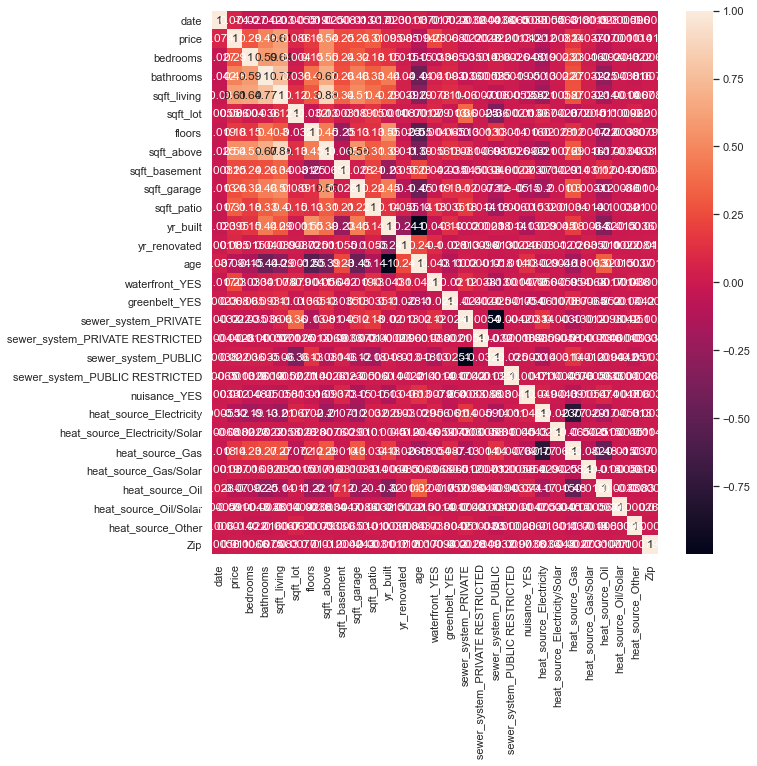

In [531]:
sns.set(rc={'figure.figsize':(10, 10)})
sns.heatmap(Complete_data.corr(), annot=True);

In [ ]:
exog = Complete_data.drop('price', axis=1)
endog = Complete_data['price']
multiple_model = sm.OLS(endog=endog, exog = sm.add_constant(exog))

multiple_model_results = multiple_model.fit()
print(multiple_model_results.summary())